In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy
from datetime import datetime

import src.utils as utils
from src.nqs import RBM, RandomHamiltonian

import matplotlib.pyplot as plt
%matplotlib notebook


In [3]:
visible_size = 4
hidden_size = 12
seed = 42  # Seed for random number generator
gradient_steps = 500
#walker_steps = 1000 # Using exact distribution to calculate energies
learning_rate = 0.01


In [4]:
np.random.seed(seed)
hamiltonian = RandomHamiltonian(n=visible_size)

In [5]:
eig,_ = np.linalg.eigh(hamiltonian)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


E_truth: -13.055371981671408


In [6]:
energy_list = []
legend = []

walker_list=[0, 100, 250, 500, 1000]

for steps in walker_list:

    walker_steps = steps
    np.random.seed(seed)
    
    rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=hamiltonian, walker_steps=walker_steps)

    energy_list.append([it for it in rbm.train(iterations=gradient_steps, lr=0.01, analytical_grad=True)])
    legend.append(f"MCMC {walker_steps}")



Current ground state: -6.070592936861383 for training step 0
Current ground state: -6.555736927395337 for training step 1
Current ground state: -6.639278437109844 for training step 2
Current ground state: -6.744865873824072 for training step 3
Current ground state: -6.998433494653257 for training step 4
Current ground state: -7.339040987301374 for training step 5
Current ground state: -7.66846197932314 for training step 6
Current ground state: -7.915930100649816 for training step 7
Current ground state: -8.070321319121332 for training step 8
Current ground state: -8.169385066973517 for training step 9
Current ground state: -8.258244989762382 for training step 10
Current ground state: -8.359961756633897 for training step 11
Current ground state: -8.472991594136495 for training step 12
Current ground state: -8.581677257532583 for training step 13
Current ground state: -8.66718202343191 for training step 14
Current ground state: -8.716860838144704 for training step 15
Current ground state

Current ground state: -12.48509096921033 for training step 238
Current ground state: -12.486735166185351 for training step 239
Current ground state: -12.488378468213178 for training step 240
Current ground state: -12.490022359951974 for training step 241
Current ground state: -12.491668334956362 for training step 242
Current ground state: -12.49331789436328 for training step 243
Current ground state: -12.494972546178136 for training step 244
Current ground state: -12.496633805593442 for training step 245
Current ground state: -12.498303196316542 for training step 246
Current ground state: -12.49998225197816 for training step 247
Current ground state: -12.501672516798653 for training step 248
Current ground state: -12.503375545711666 for training step 249
Current ground state: -12.505092904347372 for training step 250
Current ground state: -12.506826169409816 for training step 251
Current ground state: -12.508576929808589 for training step 252
Current ground state: -12.51034678803668 fo

Current ground state: -13.051062709075682 for training step 480
Current ground state: -13.051228779541121 for training step 481
Current ground state: -13.051388982562907 for training step 482
Current ground state: -13.051543498109393 for training step 483
Current ground state: -13.0516925022398 for training step 484
Current ground state: -13.051836167073951 for training step 485
Current ground state: -13.05197466075691 for training step 486
Current ground state: -13.052108147426647 for training step 487
Current ground state: -13.052236787190537 for training step 488
Current ground state: -13.052360736114178 for training step 489
Current ground state: -13.052480146224612 for training step 490
Current ground state: -13.052595165528286 for training step 491
Current ground state: -13.052705938043612 for training step 492
Current ground state: -13.052812603846778 for training step 493
Current ground state: -13.052915299129314 for training step 494
Current ground state: -13.053014156265531 f

Current ground state: -9.709256366556069 for training step 110
Current ground state: -10.226870072239384 for training step 111
Current ground state: -11.805855505228179 for training step 112
Current ground state: -10.513316566083498 for training step 113
Current ground state: -10.764885839669414 for training step 114
Current ground state: -10.508665616257378 for training step 115
Current ground state: -10.556110259643821 for training step 116
Current ground state: -11.079106907144492 for training step 117
Current ground state: -10.381739194079591 for training step 118
Current ground state: -10.8680476951232 for training step 119
Current ground state: -11.554109903929797 for training step 120
Current ground state: -10.374200631494237 for training step 121
Current ground state: -10.351452121105849 for training step 122
Current ground state: -10.448951412932574 for training step 123
Current ground state: -10.586375309260728 for training step 124
Current ground state: -10.552813833512445 f

Current ground state: -11.875863249582348 for training step 245
Current ground state: -11.2760956646662 for training step 246
Current ground state: -11.943345971152379 for training step 247
Current ground state: -11.33413572785012 for training step 248
Current ground state: -11.630675905731174 for training step 249
Current ground state: -12.169714775844145 for training step 250
Current ground state: -11.772869211459083 for training step 251
Current ground state: -11.445985986445763 for training step 252
Current ground state: -11.312023392902503 for training step 253
Current ground state: -11.43605131648761 for training step 254
Current ground state: -11.395761410346177 for training step 255
Current ground state: -11.874771331039733 for training step 256
Current ground state: -11.72459412660863 for training step 257
Current ground state: -11.704961862960408 for training step 258
Current ground state: -11.611743857818183 for training step 259
Current ground state: -11.638580763072628 for

Current ground state: -12.428815655608528 for training step 379
Current ground state: -12.647356507734454 for training step 380
Current ground state: -12.262791722798347 for training step 381
Current ground state: -12.463065148524741 for training step 382
Current ground state: -12.234913279010284 for training step 383
Current ground state: -12.526757661619845 for training step 384
Current ground state: -12.456458995465377 for training step 385
Current ground state: -12.451223734763404 for training step 386
Current ground state: -12.296888598320663 for training step 387
Current ground state: -12.869430340596892 for training step 388
Current ground state: -12.282015271292996 for training step 389
Current ground state: -12.280707093572246 for training step 390
Current ground state: -12.347739170010305 for training step 391
Current ground state: -12.375341207257065 for training step 392
Current ground state: -13.140104025326762 for training step 393
Current ground state: -12.71892135005962

Current ground state: -7.657544621271652 for training step 7
Current ground state: -7.900996468082497 for training step 8
Current ground state: -7.941011924984994 for training step 9
Current ground state: -8.197986493319815 for training step 10
Current ground state: -8.746967859397504 for training step 11
Current ground state: -7.688205848538275 for training step 12
Current ground state: -7.347185247672029 for training step 13
Current ground state: -7.947810215352847 for training step 14
Current ground state: -8.688436280764932 for training step 15
Current ground state: -7.232177032878283 for training step 16
Current ground state: -9.118168695581812 for training step 17
Current ground state: -8.616874143901143 for training step 18
Current ground state: -8.53444636110542 for training step 19
Current ground state: -8.901971632068962 for training step 20
Current ground state: -8.592101549830405 for training step 21
Current ground state: -8.801458406161087 for training step 22
Current grou

Current ground state: -10.919683011137138 for training step 139
Current ground state: -10.926816626803749 for training step 140
Current ground state: -10.834174450065337 for training step 141
Current ground state: -11.073853546461043 for training step 142
Current ground state: -11.180017514789263 for training step 143
Current ground state: -10.923844718911209 for training step 144
Current ground state: -11.217347338718893 for training step 145
Current ground state: -11.030464376891628 for training step 146
Current ground state: -10.971250172132105 for training step 147
Current ground state: -11.067033698383833 for training step 148
Current ground state: -11.097084538309883 for training step 149
Current ground state: -11.42202311362289 for training step 150
Current ground state: -11.368338429828329 for training step 151
Current ground state: -11.385818953851738 for training step 152
Current ground state: -11.373899415013378 for training step 153
Current ground state: -11.137432976268073

Current ground state: -12.49400945463557 for training step 268
Current ground state: -12.568251938555406 for training step 269
Current ground state: -12.608263320934176 for training step 270
Current ground state: -12.739716224303162 for training step 271
Current ground state: -12.649966718889159 for training step 272
Current ground state: -12.470412015766817 for training step 273
Current ground state: -12.627153910745168 for training step 274
Current ground state: -12.476167329015404 for training step 275
Current ground state: -12.414343386039684 for training step 276
Current ground state: -12.498085164963639 for training step 277
Current ground state: -12.35230931560362 for training step 278
Current ground state: -12.533158430009365 for training step 279
Current ground state: -12.46775381550028 for training step 280
Current ground state: -12.531474227957792 for training step 281
Current ground state: -12.537434571405935 for training step 282
Current ground state: -12.623983249220622 f

Current ground state: -12.765783755279985 for training step 397
Current ground state: -12.850500675354029 for training step 398
Current ground state: -12.66943334158479 for training step 399
Current ground state: -12.736578256567162 for training step 400
Current ground state: -12.79020727109924 for training step 401
Current ground state: -12.727836923854534 for training step 402
Current ground state: -12.750871901819215 for training step 403
Current ground state: -12.725172941354781 for training step 404
Current ground state: -12.621210541327835 for training step 405
Current ground state: -12.84531098391138 for training step 406
Current ground state: -12.744068151758604 for training step 407
Current ground state: -12.92417262232785 for training step 408
Current ground state: -12.872813685338759 for training step 409
Current ground state: -13.131872441392906 for training step 410
Current ground state: -12.903238399034763 for training step 411
Current ground state: -12.844605357654109 fo

Current ground state: -8.646158669624583 for training step 25
Current ground state: -9.009524452573725 for training step 26
Current ground state: -8.90771037017295 for training step 27
Current ground state: -9.039942524003818 for training step 28
Current ground state: -8.954556482489574 for training step 29
Current ground state: -9.007240742222857 for training step 30
Current ground state: -9.779689415701744 for training step 31
Current ground state: -9.025268395519621 for training step 32
Current ground state: -8.959150645276157 for training step 33
Current ground state: -8.836317535927222 for training step 34
Current ground state: -8.874205002630015 for training step 35
Current ground state: -8.93553148145465 for training step 36
Current ground state: -9.104854067232996 for training step 37
Current ground state: -9.173512125313515 for training step 38
Current ground state: -9.1758981714291 for training step 39
Current ground state: -9.206767731978802 for training step 40
Current grou

Current ground state: -11.273055977144978 for training step 156
Current ground state: -11.426497799718737 for training step 157
Current ground state: -11.338238012955479 for training step 158
Current ground state: -11.364722337698183 for training step 159
Current ground state: -11.417513489527835 for training step 160
Current ground state: -11.455898402328717 for training step 161
Current ground state: -11.461947487393752 for training step 162
Current ground state: -11.468687288293431 for training step 163
Current ground state: -11.440239730457616 for training step 164
Current ground state: -11.381868398605365 for training step 165
Current ground state: -11.416660780928687 for training step 166
Current ground state: -11.337578653522655 for training step 167
Current ground state: -11.446745728017031 for training step 168
Current ground state: -11.585009872666314 for training step 169
Current ground state: -11.544998732586933 for training step 170
Current ground state: -11.47047889583238

Current ground state: -12.295367920307454 for training step 286
Current ground state: -12.22111659257438 for training step 287
Current ground state: -12.455743329611265 for training step 288
Current ground state: -12.402005897004758 for training step 289
Current ground state: -12.356454436222334 for training step 290
Current ground state: -12.370640864521329 for training step 291
Current ground state: -12.389474914222205 for training step 292
Current ground state: -12.467171771302507 for training step 293
Current ground state: -12.3140897183557 for training step 294
Current ground state: -12.517175330727424 for training step 295
Current ground state: -12.390198047659972 for training step 296
Current ground state: -12.469995413282653 for training step 297
Current ground state: -12.499168458647715 for training step 298
Current ground state: -12.485567967908265 for training step 299
Current ground state: -12.51462748914124 for training step 300
Current ground state: -12.410921577147482 fo

Current ground state: -12.86452036780801 for training step 416
Current ground state: -12.802134013316826 for training step 417
Current ground state: -12.894408896376433 for training step 418
Current ground state: -12.81305911245794 for training step 419
Current ground state: -12.96518526270261 for training step 420
Current ground state: -12.872790540665392 for training step 421
Current ground state: -12.905900849611681 for training step 422
Current ground state: -12.899151873846451 for training step 423
Current ground state: -12.880199812149948 for training step 424
Current ground state: -12.863379960662202 for training step 425
Current ground state: -12.79516735469017 for training step 426
Current ground state: -12.864710426736616 for training step 427
Current ground state: -12.880787627981412 for training step 428
Current ground state: -12.929553829100994 for training step 429
Current ground state: -12.8738972894575 for training step 430
Current ground state: -12.880688896544747 for 

Current ground state: -9.812398531897122 for training step 44
Current ground state: -9.881761002082078 for training step 45
Current ground state: -10.126790263137845 for training step 46
Current ground state: -10.042479282259531 for training step 47
Current ground state: -10.017386108229577 for training step 48
Current ground state: -10.199073971630103 for training step 49
Current ground state: -10.367485411226145 for training step 50
Current ground state: -10.392019050633492 for training step 51
Current ground state: -10.535428348124874 for training step 52
Current ground state: -10.264761846854494 for training step 53
Current ground state: -10.447649550409368 for training step 54
Current ground state: -10.314686800553403 for training step 55
Current ground state: -10.505244306978451 for training step 56
Current ground state: -10.85210836805505 for training step 57
Current ground state: -10.55123099867173 for training step 58
Current ground state: -10.540949435714294 for training step

Current ground state: -11.902332514978259 for training step 174
Current ground state: -11.904852834734637 for training step 175
Current ground state: -11.927742013006847 for training step 176
Current ground state: -11.966824265585434 for training step 177
Current ground state: -11.94485479625759 for training step 178
Current ground state: -12.041443922976137 for training step 179
Current ground state: -11.962783510523314 for training step 180
Current ground state: -12.04873535268296 for training step 181
Current ground state: -11.98540866307829 for training step 182
Current ground state: -11.8485841447356 for training step 183
Current ground state: -11.997630517705133 for training step 184
Current ground state: -11.99917178298447 for training step 185
Current ground state: -12.048102398337205 for training step 186
Current ground state: -12.091646473456667 for training step 187
Current ground state: -12.06191855528698 for training step 188
Current ground state: -11.900120748372945 for t

Current ground state: -12.457457646502867 for training step 303
Current ground state: -12.530345374953395 for training step 304
Current ground state: -12.478600312242811 for training step 305
Current ground state: -12.490616990547187 for training step 306
Current ground state: -12.533504286368277 for training step 307
Current ground state: -12.449815260955846 for training step 308
Current ground state: -12.570115724211956 for training step 309
Current ground state: -12.58297060149562 for training step 310
Current ground state: -12.514108384237437 for training step 311
Current ground state: -12.509053640444352 for training step 312
Current ground state: -12.498630838305635 for training step 313
Current ground state: -12.493155052168627 for training step 314
Current ground state: -12.461158947235017 for training step 315
Current ground state: -12.472199415820057 for training step 316
Current ground state: -12.520280478430184 for training step 317
Current ground state: -12.504730896531079

Current ground state: -12.803560196470666 for training step 432
Current ground state: -12.844692155083703 for training step 433
Current ground state: -12.835346912055202 for training step 434
Current ground state: -12.833350418335606 for training step 435
Current ground state: -12.864804978765186 for training step 436
Current ground state: -12.854129779398288 for training step 437
Current ground state: -12.89090073361253 for training step 438
Current ground state: -12.876272125995879 for training step 439
Current ground state: -12.830478244473179 for training step 440
Current ground state: -12.864436479380956 for training step 441
Current ground state: -12.827292600668137 for training step 442
Current ground state: -12.829971727601443 for training step 443
Current ground state: -12.883173178730777 for training step 444
Current ground state: -12.935241033138547 for training step 445
Current ground state: -12.854805305409874 for training step 446
Current ground state: -12.875598276404734

<IPython.core.display.Javascript object>


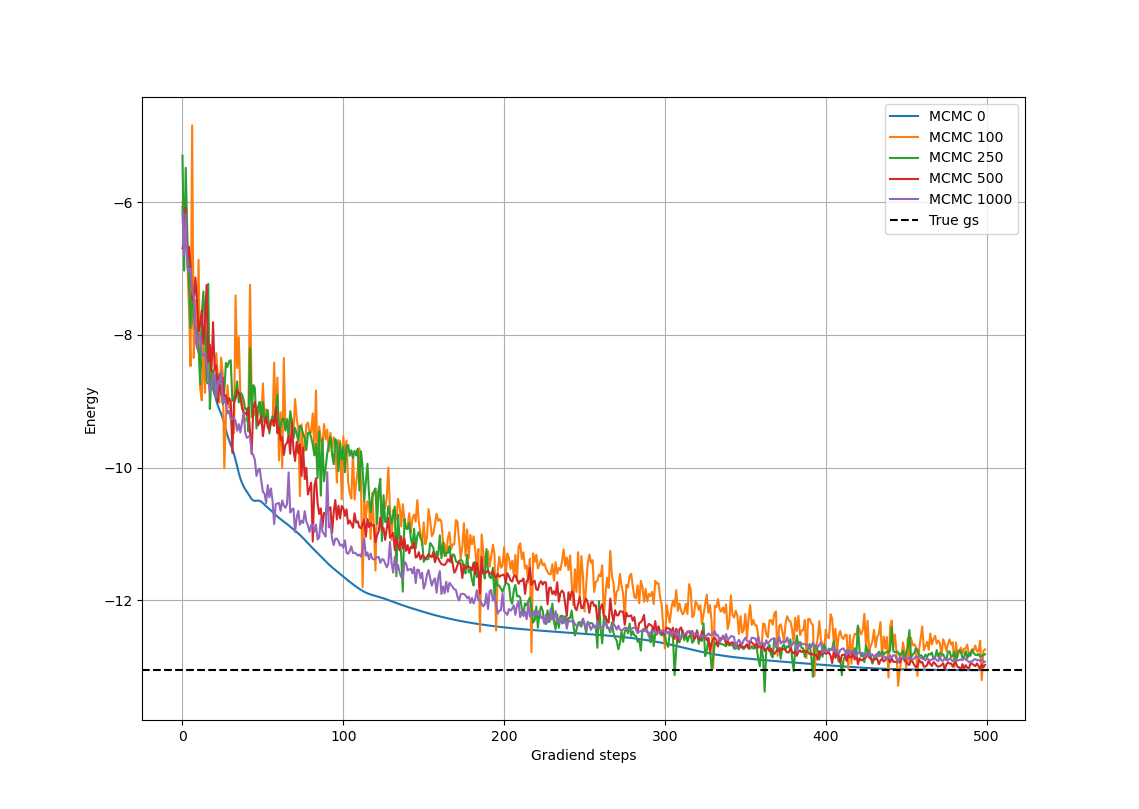

In [8]:
plt.figure(1)

legend.append("True gs")

for list in energy_list:
    
    plt.plot(list)
    
plt.axhline(y=I_truth, color='k', linestyle='--')
#plt.title("Analytic/Finite difference gradient comparison")
plt.legend(legend)
plt.xlabel('Gradiend steps')
plt.ylabel('Energy')
plt.grid()

In [16]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\FDmcmc5v10h{datetime.now().strftime(date_format)}.pdf"


plt.savefig(f"{path}", bbox_inches = "tight")